РК№1 ИУ5-62Б Ковалев Сергей
Вариант 14
Задача №2
https://www.kaggle.com/rhuebner/human-resources-data-set

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

# Загрузка данных

In [25]:
data = pd.read_csv('/Users/set27/Downloads/HRDataset_v14.csv' , sep=",")

In [26]:
# Размер набора
data.shape

(311, 36)

In [27]:
# Типы колонок
data.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [28]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 311


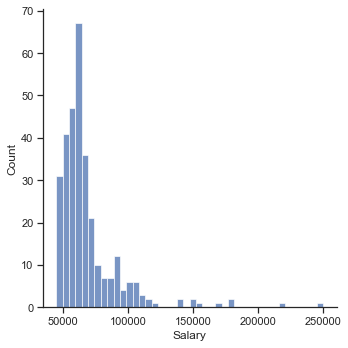

In [30]:
sns.displot (x=data['Salary'])

In [31]:
# Найдем пропуски в столбцах
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [32]:
  num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]     
    dt = str(data[col].dtype)     
    if temp_null_count>0 and (dt=='float64' or dt=='object' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)         
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))


Колонка DateofTermination. Тип данных object. Количество пустых значений 207, 66.56%.
Колонка ManagerID. Тип данных float64. Количество пустых значений 8, 2.57%.


In [33]:
# В колонке ManagerID, заменим пропущенные значения на 0
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count > 0 and (dt=='float64'):
        data[col]=data[col].fillna('0')

In [34]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]     
    dt = str(data[col].dtype)     
    if temp_null_count>0 and (dt=='float64' or dt=='object' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)         
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))



Колонка DateofTermination. Тип данных object. Количество пустых значений 207, 66.56%.


Так как колонка DateofTermination имеет 66,56% пропусков, мы ее не будем использовать для построения модели.
В колонке ManagerID, замена была произведена путем замены пропущенных значений на нулевые, так как это MfnfgerID здесь нельзя использовать использовать, например, замену по средним значениям.